Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Run$\rightarrow$Run All Cells). Alternatively, you can use the **validate** button in the assignment list panel.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. When you insert your Code you can remove the line `raise NotImplementedError()`. Also put your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

## 2 Data Generator

In this section, we focus on the fundamentals of the data generator. In order to Generate artificial classification data:
    1. Generate two classes with normal distributed features.
    2. Transform one class to log-normal distributed features.
    3. Shift one class to enlarge effect size. (optional ?)
    4. Generate random features (optional ?).
    5. Generate pseudo class features (optional ?).
    6. Generate pseudo classes (optional ?).
    7. Generate data frame.
    8. Drop perfectly separated features. (optional)
    9. Save data frame as csv.
   


In [2]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

# suppress warnings
warnings.filterwarnings("ignore", category=IterationLimitWarning)

## Task 2.1 Set values
`TODO Sinnvolle Werte setzen oder nach Vorgabe, was für Daten generiert werden sollen`

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()

number_of_samples_per_class = 15
number_of_informative_features = 30
number_of_pseudo_class_features = 10
number_of_random_features = 10000

## Task 2.2 Generate class 1
Once the desired settings have been adjusted, we can proceed to generate the first entire class. The result and its distribution are displayed in a histogram.

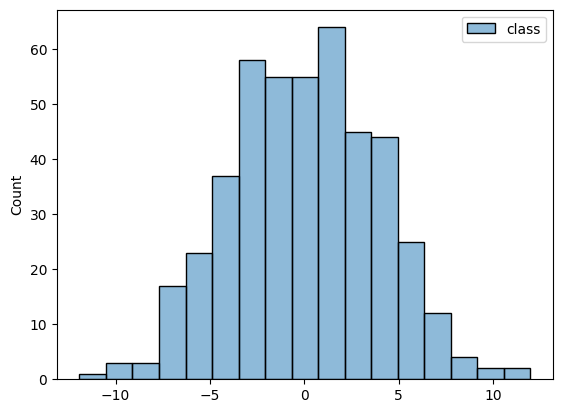

In [13]:
class1_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class1_data_array = artificial_data_generator_tools.build_class(class_features_list=[class1_data_array])

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_data_array)

## 1.3 Transform class 1 to log-normal distributed features
Class 1 needs to be transformed to log-normal distribution. The new result is displayed in a histogram.

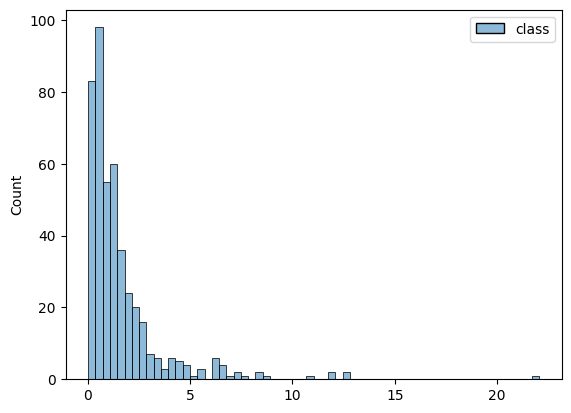

In [5]:
log_normal_distributed_class1_data_array = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_data_array=class1_data_array
    )
)
assert log_normal_distributed_class1_data_array.shape[1] == number_of_informative_features

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_data_array,
)

## 1.4 Generate class 2
The second class is generated with the same values as Class 1.

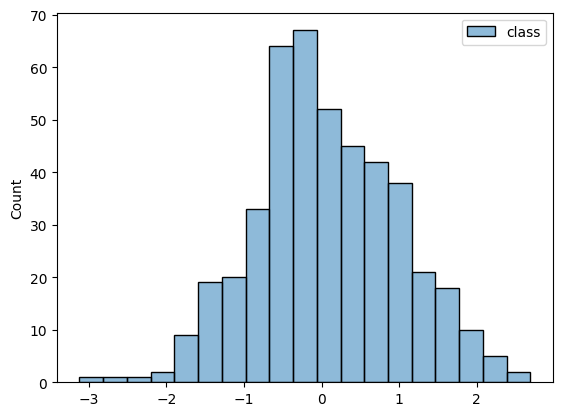

In [6]:
class2_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class2_data_array = artificial_data_generator_tools.build_class(class_features_list=[class2_data_array])

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_data_array)

## 1.5 Show plot distribution of all classes
Once both classes have been generated, their distributions can be superimposed and examined.

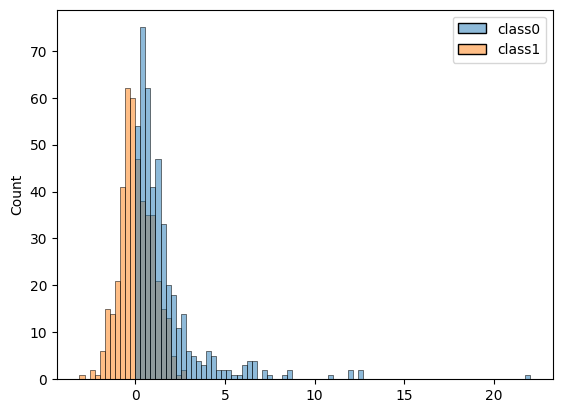

In [7]:
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [log_normal_distributed_class1_data_array, class2_data_array]
)

## 1.6 Shift Class to enlarge effectsize
In the next step, the effect size is increased by shifting the class. The result is again visible in the plot. To see the effect, compare the plot with the one from Section 1.5.

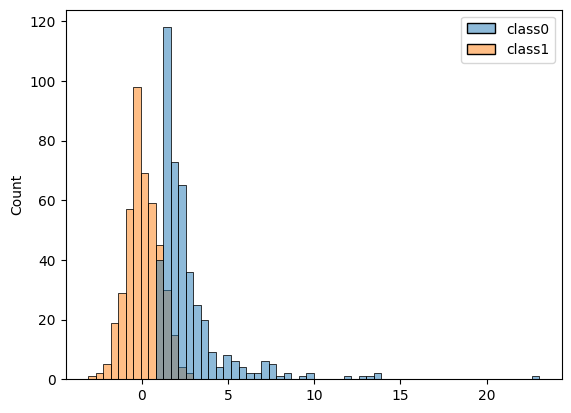

In [8]:
shifted_class1_data_array = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_data_array, effect_size=1
)

# show plot
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_data_array, class2_data_array])

## 1.7 Generate artificial classification data
The individual parts of the data are combined to form the complete data set. The dataset consists of the following parts and in the following order:
- class labels
- informative features
- pseudo class features
- random features

In [9]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_data_array, class2_data_array],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
assert (
    artificial_data_df.shape[1]
    == number_of_informative_features + number_of_pseudo_class_features + number_of_random_features + 1
)  # label column
print("The complete data set has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set has the following shape:
number of samples: 30
number of features: 10041


## 1.8 Perfectly seperated features
Perfectly separated features are features which do not overlap at any point. This means that the minimum value of one feature is larger than the maximum value of the other feature or vice versa. This case is not realistic for the discovery of new biomarkers. Therefore, these features are removed from the data set.

In [10]:
indices_of_perfectly_separated_features = artificial_data_generator_tools.find_perfectly_separated_features(
    [shifted_class1_data_array, class2_data_array]
)
separated_artificial_data_df = artificial_data_generator_tools.drop_perfectly_separated_features(
    list_of_perfectly_separated_features=indices_of_perfectly_separated_features, data_df=artificial_data_df
)
# check if first column is class label
assert separated_artificial_data_df.columns[0] == "label"

print("The complete data set without perfectly separated features has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set without perfectly separated features has the following shape:
number of samples: 30
number of features: 10041


## 1.9 Save CSV
In the final step, the data can be downloaded in CSV format and are ready for further analysis and processing.

In [11]:
# number of informative features
number_of_informative_separated_features = number_of_informative_features - len(indices_of_perfectly_separated_features)
separated_artificial_data_df.to_csv(
    f"../examples/data/separated_i{number_of_informative_separated_features}.csv", index=False
)